<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/lab_1_GD_SGD_ADAGRAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. *Импорт библиотек и вспомогательные функции/классы*

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Tuple, Mapping

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Реализация шедулера

In [ ]:
class Lr:
  def __init__(self, lr) -> None:
    self.lr = lr

  def step(self):
    self.lr -= 0.0001

Функция для отрисовки графиков

In [ ]:
def draw_f(title: str, x: np.array, y:np.array, f: Mapping, point_x:np.array, point_y:np.array, iter: int):
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)

  fig = plt.figure(figsize=(8, 6))
  
  fig.suptitle(title, fontsize=14)
  ax = fig.add_subplot(111, projection='3d')
  
  for _ in range(iter):
    ax.scatter(point_x[_], point_y[_], f(point_x[_],point_y[_]), c='black', s=10, alpha =1, marker = 'o');

  ax.plot_surface(X, Y, Z, cmap="cool",  alpha=0.5)

# 1. *Тестовая функции и их производные*

### Функция Матьяса

$0.26 (x^2 + y^2) - 0.48  x y$

In [ ]:
def f_mat (x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x +y*y)-0.48*x*y

In [ ]:
def dx_mat (x: np.array, y:np.array) -> np.float128:
  return 0.52 *x -0.48*y

In [ ]:
def dy_mat(x: np.array, y:np.array) -> np.float128:
  return 0.52 * y - 0.48*x

### Функция трехгорбого верблюда

$2x^2 -1.05 x^4 + (x^6)/6 + xy + y^2$

In [ ]:
def f_3ver(x: np.array, y:np.array) -> np.float128:
  return 2*x*x -1.05 * x**4 + (x**6)/6 + x*y + y*y

In [ ]:
def dx_3ver(x: np.array, y:np.array) -> np.float128:
  return x**5 - (21* x**3)/5 +4*x + y

In [ ]:
def dy_3ver(x: np.array, y:np.array) -> np.float128:
  return 2*y +x

# 2. *Градиентный метод* 


In [ ]:
def GD( f: Mapping, dx: Mapping, dy: Mapping, point: np.array, lr: float, iter: int, l: float, r:float):
  '''
  f - входная функция
  dx, - производная функции по х
  dy, - производная функция по y
  point - точка входа
  lr, -  learning rate шаг
  iter, - кол-во итераций
  l, r - левая и правая граница x, y
  '''
  point_x, point_y = [], []

  x = np.arange(l, r, 0.1)
  y = np.arange(l, r, 0.1)

  lr = Lr(lr)

  for _ in range(iter):
    gx= dx(point[0], point[1])
    gy = dy(point[0], point[1])

    point[0] = point[0] - gx * lr.lr
    point[1] = point[1] - gy * lr.lr

    point_x.append(point[0])
    point_y.append(point[1])
  
  draw_f('Градиентный метод', x, y, f, point_x, point_y, iter)
  return point

0.0 [0 0]


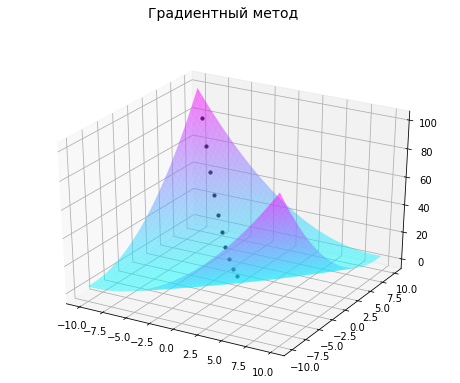

In [ ]:
point = np.array([-10,10])
and_point = GD(f_mat, dx_mat, dy_mat, point, 0.001, 10, -10, 10 )
print(f_mat(point[0], point[1]), and_point)

0.0 [0 0]


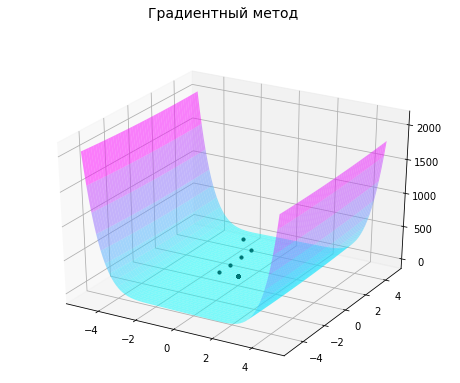

In [ ]:
point = np.array([-5,5])
and_point = GD(f_3ver, dx_3ver, dy_3ver, point, 0.001, 100, -5, 5 )
print(f_3ver(point[0], point[1]), and_point)

# 3. *Стохастический градиентный спуск*

In [ ]:
def SGD (f: Mapping, dx: Mapping, dy: Mapping, point: np.array, lr: float, iter: int, m: float, l: float, r:float):
  '''
  f - входная функция
  dx, - производная функции по х
  dy, - производная функция по y
  point - точка входа
  lr, -  learning rate шаг
  iter, - кол-во итераций
  m, -  momentum factor 
  l, r - левая и правая граница x, y
  '''
  point_x, point_y = [], []

  x = np.arange(l, r, 0.1)
  y = np.arange(l, r, 0.1)

  lr = Lr(lr)

  for i in range(iter):
    gx = dx(point[0], point[1])
    gy = dy(point[0], point[1])
    
    if i == 0 :
      vx = gx
      vy = gy
    else:
      vx = m * vx + gx
      vy = m * vy + gy

    point[0] = point[0] - vx * lr.lr
    point[1] = point[1] - vy * lr.lr

    point_x.append(point[0])
    point_y.append(point[1])
  
  draw_f('Стохастический градиентный спуск', x, y, f, point_x, point_y, iter)

  return point

0.0 [0 0]


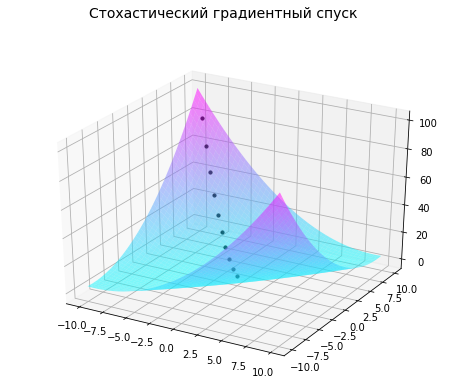

In [ ]:
point = np.array([-10,10])
and_point = SGD(f_mat, dx_mat, dy_mat, point, 0.001, 10, 0.01, -10, 10 )
print(f_mat(point[0], point[1]), and_point)

0.0 [0 0]


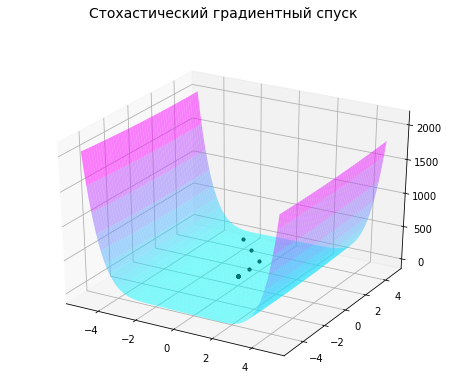

In [ ]:
point = np.array([-5,5])
and_point = SGD(f_3ver, dx_3ver, dy_3ver, point, 0.001, 100, 0.1, -5, 5 )
print(f_3ver(point[0], point[1]), and_point)

# 4. *Адаптивный градиентный алгоритм*

In [ ]:
def ADAGRAD (f: Mapping, dx: Mapping, dy: Mapping, point: np.array, lr: float, iter: int, l: float, r:float):
  '''
  f - входная функция
  dx, - производная функции по х
  dy, - производная функция по y
  point - точка входа
  lr, -  learning rate шаг
  iter, - кол-во итераций
  m, -  momentum factor 
  l, r - левая и правая граница x, y
  '''
  point_x, point_y = [], []

  x = np.arange(l, r, 0.1)
  y = np.arange(l, r, 0.1)

  lr = Lr(lr)

  s_sum_x = 0
  s_sum_y = 0

  for _ in range(iter):
    gx = dx(point[0], point[1])
    gy = dy(point[0], point[1])
    
    s_sum_x = s_sum_x  + gx * gx
    s_sum_y = s_sum_y  + gy * gy

    point[0] = point[0] - lr.lr * (gx / math.sqrt(s_sum_x))
    point[1] = point[1] - lr.lr * (gy / math.sqrt(s_sum_y))
    point_x.append(point[0])
    point_y.append(point[1])
  
  draw_f('Адаптивный градиентный алгоритм',x, y, f, point_x, point_y, iter)

  return point

0.0 [0 0]


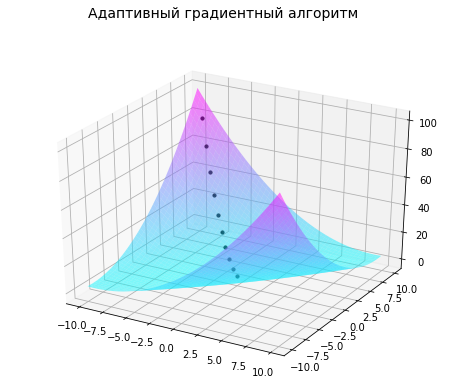

In [ ]:
point = np.array([-10,10])
and_point =  ADAGRAD(f_mat, dx_mat, dy_mat, point, 0.001, 10, -10, 10 )
print(f_mat(point[0], point[1]), and_point)

0.0 [0 0]


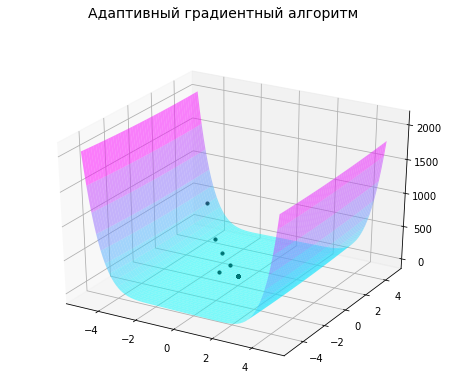

In [ ]:
point = np.array([-5,5])
and_point = ADAGRAD(f_3ver, dx_3ver, dy_3ver, point, 0.001, 100, -5, 5 )
print(f_3ver(point[0], point[1]), and_point)